In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import rcParams

In [2]:
data = pd.read_csv("C:/Users/fabri/OneDrive/Desktop/GIT/Data_Management_Project/Csv/Exported_queries/mtime_manipulated.csv")
data.head()

,Unnamed: 0,mtime,group_country,group_state,long,lat,timezone_str,datetime_timezoned,date,time
0,0,1545782699258,us,fl,-80.15,26.02,America/New_York,25/12/2018 19:00:00,Tuesday,19:00:00
1,1,1545827677229,us,pa,-75.20,39.96,America/New_York,26/12/2018 08:00:00,Wednesday,08:00:00
2,2,1545785377241,nz,none,174.78,-41.28,Pacific/Auckland,26/12/2018 14:00:00,Wednesday,14:00:00
3,3,1545780008634,us,ny,-73.38,40.69,America/New_York,25/12/2018 18:00:00,Tuesday,18:00:00
4,4,1545770541536,us,tx,-106.49,31.76,America/Denver,25/12/2018 14:00:00,Tuesday,14:00:00


In [3]:
data1 = data[['date','time']] #define new dataframe
data1.head() #check

,date,time
0,Tuesday,19:00:00
1,Wednesday,08:00:00
2,Wednesday,14:00:00
3,Tuesday,18:00:00
4,Tuesday,14:00:00


In [4]:
data1['date'] = pd.Categorical(data1['date'], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
#sorting the days of the week 
data1['values'] = 1 #create a column that represent the single instance
pivot_table = data1.pivot_table(values = 'values', index = 'date', columns = 'time', aggfunc = np.sum)
#using the representation of the value we can use np.sum to calculate the number of times a message is generated in a certain
#week's day, in a certain hour
pivot_table
#we can ignore this warning, it's caused by the creation of values' column, but being composed of only 1 this warning is useless

C:\Users\fabri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\fabri\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


time,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
date,,,,,,,,,,,,,,,,,,,,,
Monday,1682,2228,1186,803,531,541,606,575,984,1557,...,1464,1222,1355,1059,932,642,318,165,118,79
Tuesday,2493,23,19,16,10,8,10,22,44,109,...,3484,4094,6061,6646,7169,7408,7411,8410,7781,6125
Wednesday,6422,2641,1573,1124,1046,1244,2339,4314,7592,11258,...,17451,17465,16891,16618,15081,14582,14902,16496,14950,11552
Thursday,8078,4696,2972,1865,1566,2085,3089,5594,8972,12821,...,18019,18471,18668,18821,17296,15557,16088,16996,15933,12503
Friday,8139,4873,3187,2088,1918,2249,4110,6647,10694,14498,...,18236,17717,17741,18623,17781,16639,15131,15225,14259,11586
Saturday,6130,5386,3117,2249,1638,1862,2868,4588,7631,9017,...,9477,7697,7609,7513,7065,6723,6502,6041,5677,4847
Sunday,3517,2459,1255,849,715,670,973,1761,3351,4811,...,6388,6035,6098,6363,6020,6141,6177,6083,5585,4997


In [5]:
rcParams['figure.figsize'] = 18, 12 #define a parameter to change the figure size

Text(141,0.5,'Weekdays')

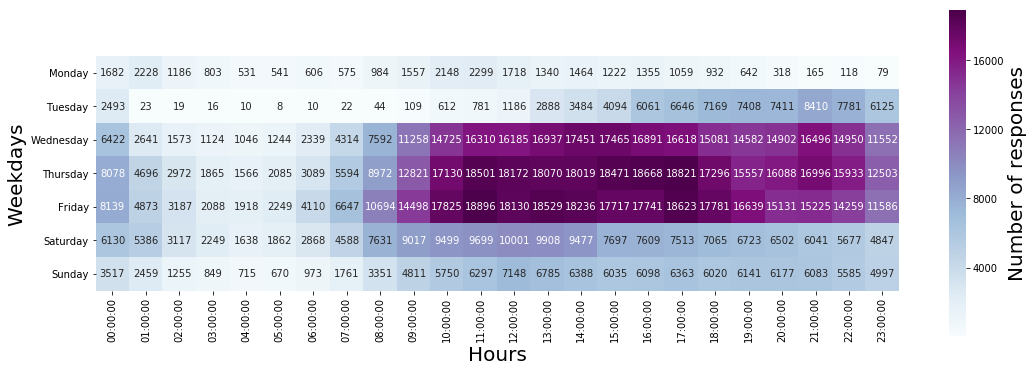

In [6]:
figure = sns.heatmap(pivot_table,cmap='BuPu', square = True, cbar_kws={"shrink": 0.5, 'label': 'Number of responses'},
                    annot=True, fmt='d') #define an heatmap to plot our pivot_table
figure.figure.axes[-1].yaxis.label.set_size(20)
figure.set_xlabel("Hours", fontsize=20)
figure.set_ylabel("Weekdays", fontsize=20)  

In [7]:
#to save the figure
#figure.figure.savefig("C:/Users/fabri/OneDrive/Desktop/heatmap.png")